In [ ]:
import torch
import torchvision
from torchvision import transforms as T
from PIL import Image
import cv2
from google.colab.patches import cv2_imshow

In [196]:
model = torchvision.models.detection.fasterrcnn_resnet50_fpn(pretrained=True)

In [197]:
img = Image.open('4.jpg').convert('RGB')
transform = T.ToTensor()
image = transform(img)

In [198]:
transform = T.ToTensor()
image = transform(img)

In [199]:
model.eval()

FasterRCNN(
  (transform): GeneralizedRCNNTransform(
      Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
      Resize(min_size=(800,), max_size=1333, mode='bilinear')
  )
  (backbone): BackboneWithFPN(
    (body): IntermediateLayerGetter(
      (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (bn1): FrozenBatchNorm2d(64, eps=0.0)
      (relu): ReLU(inplace=True)
      (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (layer1): Sequential(
        (0): Bottleneck(
          (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn1): FrozenBatchNorm2d(64, eps=0.0)
          (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn2): FrozenBatchNorm2d(64, eps=0.0)
          (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn3): FrozenBatchNorm2d(256, eps=0.0)
          (relu): ReLU(

In [200]:
with torch.no_grad():
  prediction = model([image])

In [201]:
prediction[0].keys()

dict_keys(['boxes', 'labels', 'scores'])

In [202]:
box,labels,scores = prediction[0]["boxes"], prediction[0]["labels"], prediction[0]["scores"]

In [203]:
num = torch.argwhere(scores>0.8).shape[0]

In [204]:
coco_names = ["person" , "bicycle" , "car" , "motorcycle" , "airplane" , "bus" , "train" , "truck" , "boat" , "traffic light" , "fire hydrant" , "street sign" , "stop sign" , "parking meter" , "bench" , "bird" , "cat" , "dog" , "horse" , "sheep" , "cow" ,
              "elephant" , "bear" , "zebra" , "giraffe" , "hat" , "backpack" , "umbrella" , "shoe" , "eye glasses" , "handbag" , "tie" , "suitcase" , "frisbee" , "skis" , "snowboard" , "sports ball" , "kite" , "baseball bat" , "baseball glove" , "skateboard" ,
              "surfboard" , "tennis racket" , "bottle" , "plate" , "wine glass" , "cup" , "fork" , "knife" , "spoon" , "bowl" ,  "banana" , "apple" , "sandwich" , "orange" , "broccoli" , "carrot" , "hot dog" , "pizza" , "donut" , "cake" , "chair" , "couch" ,
              "potted plant" , "bed" , "mirror" , "dining table" , "window" , "desk" , "toilet" , "door" , "tv" , "laptop" , "mouse" , "remote" , "keyboard" , "cell phone" , "microwave" , "oven" , "toaster" , "sink" , "refrigerator" , "blender" , "book" ,
              "clock" , "vase" , "scissors" , "teddy bear" , "hair drier" , "toothbrush" , "hair brush"]
len(coco_names)

91

In [205]:
font = cv2.FONT_HERSHEY_SIMPLEX
img_read= cv2.imread('4.jpg')
for i in range(num):
  x1,y1,x2,y2 = box[i].numpy().astype('int')
  class1 = coco_names[labels.numpy()[i]-1]
  detected = cv2.rectangle(img_read,(x1,y1),(x2,y2),(0,255,0),1)
  detected = cv2.putText(detected,class1,  (x1, y1 - 10), font, 0.5,  (255, 0 , 0) ,  1,  cv2.LINE_AA)

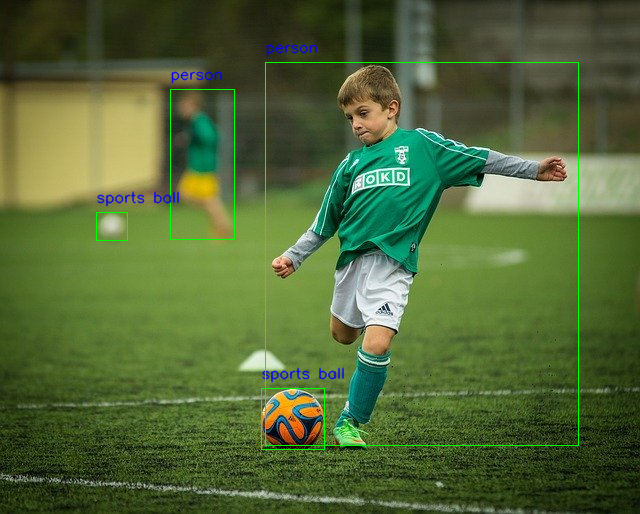

In [206]:
cv2_imshow(detected)